In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.preprocessing import LabelBinarizer

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam

In [3]:
# Loading Dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print("Shape of training data: ",x_train.shape)
print("Shape of test data: ",x_test.shape)

Shape of training data:  (60000, 28, 28)
Shape of test data:  (10000, 28, 28)


In [5]:
# Normalizing the Feature values
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

In [6]:
# Convert the labels from integer to vector
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [7]:
#creating the Deep Network 
# Model 1 
# 1.Network 1 with activation function Sigmoid everywhere
model_1 = Sequential()
model_1.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model_1.add(Dense(10)) #each layer has 10 neurons
    model_1.add(Activation("sigmoid"))
    model_1.add(BatchNormalization())
model_1.add(Dense(10,activation="sigmoid"))

In [8]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 batch_normalization (BatchN  (None, 10)               40        
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [9]:
#training model using ADAM optimizer
batch_size = 64
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [10]:
model_1.fit(x_train,y_train, epochs=25,batch_size=batch_size,validation_data=(x_test,y_test), shuffle=True, verbose=1)

Epoch 1/25
938/938 [==============================] - 7s 4ms/step - loss: 1.5822 - accuracy: 0.5038 - val_loss: 1.1544 - val_accuracy: 0.6820
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 1.0041 - accuracy: 0.7265 - val_loss: 0.7736 - val_accuracy: 0.8282
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 0.7518 - accuracy: 0.8136 - val_loss: 0.5847 - val_accuracy: 0.8682
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 0.6093 - accuracy: 0.8464 - val_loss: 0.4780 - val_accuracy: 0.8876
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 0.5197 - accuracy: 0.8642 - val_loss: 0.4094 - val_accuracy: 0.8968
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 0.4643 - accuracy: 0.8752 - val_loss: 0.3649 - val_accuracy: 0.9022
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.4300 - accuracy: 0.8830 - val_loss: 0.3374 - val_accuracy: 0.9096
Epoch 

In [11]:
# evaluate the network on the testing data to obtain our final classifications
test_loss_model_1, test_acc_model_1 = model_1.evaluate(x_test,y_test)
print("Test accuracy for model 1: ", test_acc_model_1*100," %")

313/313 [==============================] - 1s 2ms/step - loss: 0.2086 - accuracy: 0.9392
Test accuracy for model 1:  93.91999840736389  %


In [12]:
# Model 2
#2.Network 2 with activation function ReLU except output layer with activation function Sigmoid
model_2 = Sequential()
model_2.add(Flatten(input_shape = (28,28)))
for i in range(10):
    model_2.add(Dense(10))
    model_2.add(Activation("relu"))
    model_2.add(BatchNormalization())
model_2.add(Dense(10,activation="sigmoid"))

In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
 activation_10 (Activation)  (None, 10)                0         
                                                                 
 batch_normalization_10 (Bat  (None, 10)               40        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 10)                110       
                                                                 
 activation_11 (Activation)  (None, 10)                0         
                                                      

In [14]:
# training the model using ADAM optimizer
batch_size = 64
model_2.compile(optimizer=Adam(learning_rate=0.0001),loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
model_2.fit(x_train,y_train, epochs=25,batch_size=batch_size,validation_data=(x_test,y_test), shuffle=True, verbose=1)

Epoch 1/25
938/938 [==============================] - 7s 5ms/step - loss: 2.3914 - accuracy: 0.1556 - val_loss: 2.1689 - val_accuracy: 0.2282
Epoch 2/25
938/938 [==============================] - 4s 4ms/step - loss: 2.0575 - accuracy: 0.2873 - val_loss: 1.8814 - val_accuracy: 0.3567
Epoch 3/25
938/938 [==============================] - 4s 4ms/step - loss: 1.7931 - accuracy: 0.3968 - val_loss: 1.5965 - val_accuracy: 0.4559
Epoch 4/25
938/938 [==============================] - 4s 4ms/step - loss: 1.5287 - accuracy: 0.4685 - val_loss: 1.3381 - val_accuracy: 0.5188
Epoch 5/25
938/938 [==============================] - 4s 4ms/step - loss: 1.3058 - accuracy: 0.5414 - val_loss: 1.1240 - val_accuracy: 0.6150
Epoch 6/25
938/938 [==============================] - 4s 4ms/step - loss: 1.1391 - accuracy: 0.6044 - val_loss: 0.9713 - val_accuracy: 0.6750
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 1.0163 - accuracy: 0.6520 - val_loss: 0.8629 - val_accuracy: 0.7133
Epoch 

In [16]:
# evaluate the network on the testing data to obtain our final classifications
test_loss_model_2, test_acc_model_2 = model_2.evaluate(x_test,y_test)
print("Test accuracy for model 2: ", test_acc_model_2*100," %")

313/313 [==============================] - 1s 2ms/step - loss: 0.3810 - accuracy: 0.8980
Test accuracy for model 2:  89.80000019073486  %


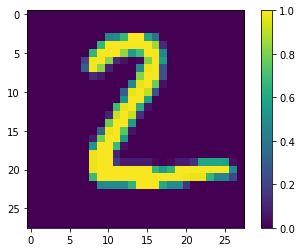

In [17]:
# Showing the testing input
plt.figure()
plt.imshow(x_test[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
# prediction on test data for model 1
predictions_1 = model_1.predict(x_test)
print(predictions_1[1])
print("Predicted Digit:",np.argmax(predictions_1[1]))

313/313 [==============================] - 1s 2ms/step
[0.2966543  0.7037622  0.9980452  0.8917778  0.0046614  0.6652499
 0.5423747  0.15814027 0.19204682 0.0630244 ]
Predicted Digit: 2


In [19]:
# prediction on test data for model 2
predictions_2 = model_2.predict(x_test)
print(predictions_2[1])
print("Predicted Digit:",np.argmax(predictions_2[1]))

313/313 [==============================] - 1s 2ms/step
[0.6376174  0.21247324 0.9983707  0.81103754 0.12796004 0.31953353
 0.8926251  0.19349602 0.27795613 0.5385275 ]
Predicted Digit: 2


Model 1 - Network 1 with activation function Sigmoid everywhere

Test Accuracy for Model 1:  93.92 %

Model 2 - Network 2 with activation function ReLU (except in the output layer, where the activation function is Sigmoid)

Test Accuracy for Model 2:  89.80 %
